In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime


In [3]:
file = Path('D:/Data Analysis/basket_details.csv')
df = pd.read_csv(file)

In [4]:
print(df.head())
print(df.info())
print(df.describe)

   customer_id  product_id basket_date  basket_count
0     42366585    41475073  2019-06-19             2
1     35956841    43279538  2019-06-19             2
2     26139578    31715598  2019-06-19             3
3      3262253    47880260  2019-06-19             2
4     20056678    44747002  2019-06-19             2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB
None
<bound method NDFrame.describe of        customer_id  product_id basket_date  basket_count
0         42366585    41475073  2019-06-19             2
1         35956841    43279538  2019-06-19             2
2         26139578    31715598  2019-06-19             3
3  

In [5]:
df.describe()
df.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [6]:
print(df["basket_date"].dtype)

object


In [7]:
df['basket_date'] = pd.to_datetime(df["basket_date"]) 
#converted the object class into datetime

df["month"] = df["basket_date"].dt.month
#added a new column 'month'
print(df.head())

   customer_id  product_id basket_date  basket_count  month
0     42366585    41475073  2019-06-19             2      6
1     35956841    43279538  2019-06-19             2      6
2     26139578    31715598  2019-06-19             3      6
3      3262253    47880260  2019-06-19             2      6
4     20056678    44747002  2019-06-19             2      6


In [ ]:
# Grouping by Product_ID and sum the basket_count
# resetting index makes it a clean dataframe again, not a series

top_products = df.groupby("product_id")["basket_count"].sum().reset_index()

# Sorting them to see the winners

top_products = top_products.sort_values(by="basket_count", ascending = False)

print(top_products.head(5))

       product_id  basket_count
9106     43524799            69
3372     31516269            59
7553     39833031            50
10047    46130148            36
5368     34913531            28


In [9]:
# Grouping by Costumer_ID to find the 'whales' - top 3 costumers who have 
# bought the most items (basket_count)

customer_counts = df.groupby("customer_id")["basket_count"].sum()

top_customers = customer_counts.sort_values(ascending = False)

print(top_customers.head(3))

customer_id
8276934     29
7097820     18
11082470    17
Name: basket_count, dtype: int64


In [10]:
june_data = df[df["month"] == 6]

print(f"Total rows for June: {len(june_data)}")
print(june_data.head())

Total rows for June: 6104
   customer_id  product_id basket_date  basket_count  month
0     42366585    41475073  2019-06-19             2      6
1     35956841    43279538  2019-06-19             2      6
2     26139578    31715598  2019-06-19             3      6
3      3262253    47880260  2019-06-19             2      6
4     20056678    44747002  2019-06-19             2      6


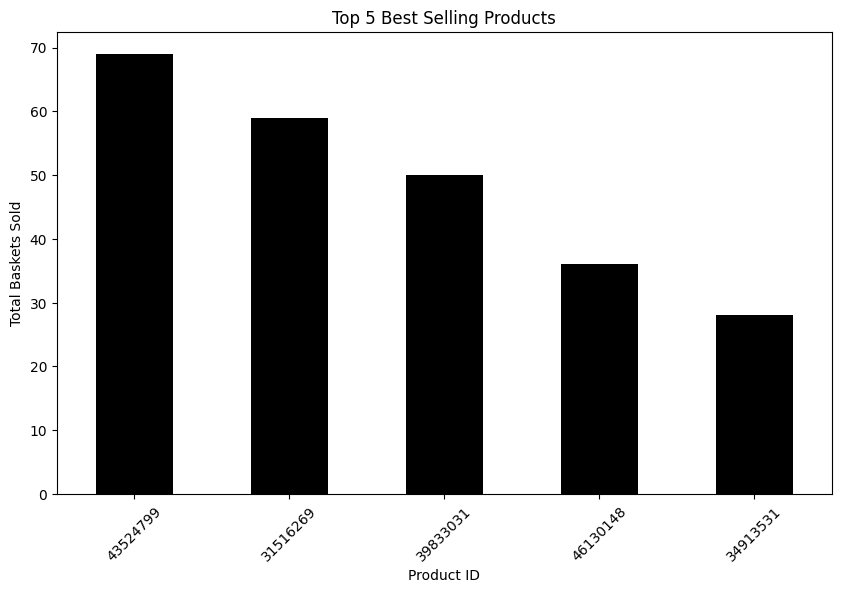

In [ ]:
# Visualizing the top 5 selling products.

# The top 5
top_5_items = df.groupby('product_id')['basket_count'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_5_items.plot(kind='bar', color='black')

plt.title('Top 5 Best Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Baskets Sold')
plt.xticks(rotation=45)
plt.show()

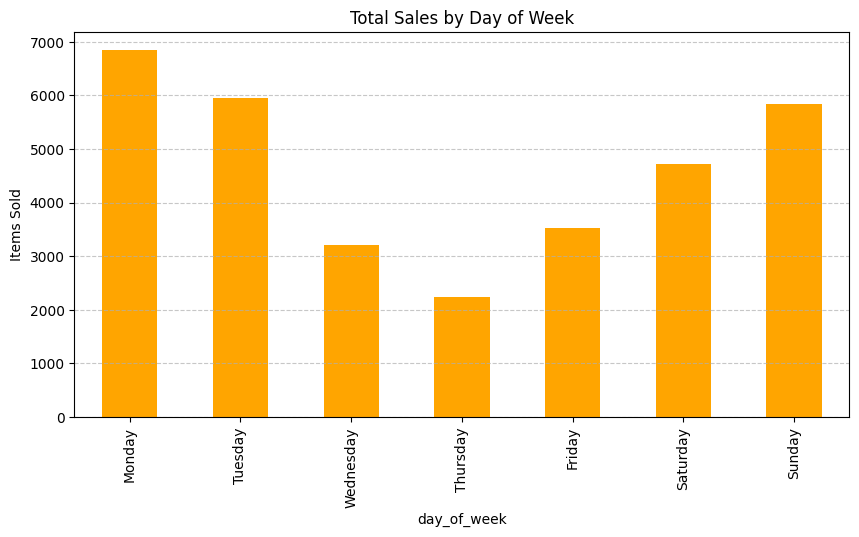

In [ ]:
# Extracting the Day Name into a new Column
df['day_of_week'] = df["basket_date"].dt.day_name()

# Grouping by Day and Sum
daily_sales = df.groupby("day_of_week")["basket_count"].sum()

#Fixing the sorting because pandas sorts alphabetically by default
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sales = daily_sales.reindex(days_order)

plt.figure(figsize = (10,5))
daily_sales.plot(kind="bar", color="orange")
plt.title("Total Sales by Day of Week")
plt.ylabel("Items Sold")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

In [ ]:
# How many unique customers
total_customers = df['customer_id'].nunique()

# How many unique products
total_products = df["product_id"].nunique()

print(f"We have {total_customers} number of distinct customers.")
print(f"We have {total_products} number of distinct products.")
if total_products > total_customers:
    results = total_products - total_customers
    print(f"Difference is: {results} more products")
else:
    print(f"Difference is: {total_customers - total_products} more customers")

We have 13871 number of distinct customers.
We have 13161 number of distinct products.
Difference is: 710 more customers


count    13871.000000
mean         1.042535
std          0.236366
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: basket_date, dtype: float64


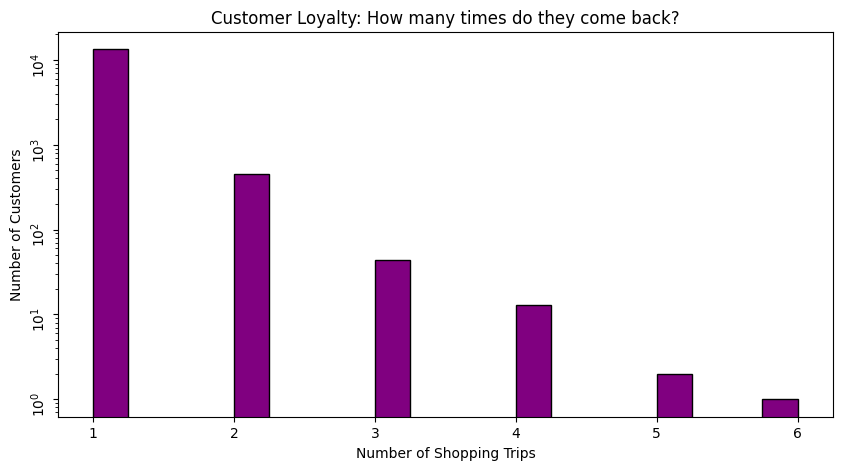

In [ ]:
# How many separate days did each customer shop?
customer_frequency = df.groupby("customer_id")["basket_date"].nunique()
print(customer_frequency.describe())

fig, ax =plt.subplots(figsize=(10,5))
ax.hist(customer_frequency, bins = 20, color = 'purple', edgecolor = 'black')
ax.set_title("Customer Loyalty: How many times do they come back?")
ax.set_xlabel("Number of Shopping Trips")
ax.set_ylabel("Number of Customers")
plt.yscale("log")
plt.yticks(rotation=90, size=10)
plt.show()

In [ ]:
pivot = df.pivot_table(index="product_id",
                       columns = "day_of_week",
                       values = "basket_count",
                       aggfunc="sum",
                       fill_value=0) # Replace NaN with 0 (important!)

# Look at first 20 rows and Monday/Sunday
# Slice it like a matrix
print(pivot[["Sunday", "Monday", "Thursday"]].head(20))

day_of_week  Sunday  Monday  Thursday
product_id                           
49390             0       0         0
52798             0       0         0
53091             0       0         0
53093             0       0         0
53238             5       0         0
56078             0       0         0
64894             0       0         0
75786             0       0         0
75816             0       0         0
75824             3       0         0
75827             0       0         2
75954             2       0         0
75982             6       2         0
75983             0       2         0
76083             0       0         0
76168             0       2         0
76210             0       0         2
76223             0       0         0
76259             2       0         0
76286             0       0         0


In [40]:
# Sort the pivot table by "Thursday" descending
thursday_winners = pivot.sort_values(by="Thursday", ascending = False)

# Show the top 5 products for Thursday
print(thursday_winners["Thursday"].head(10))

product_id
6842021     8
47103092    8
43524799    8
35187319    7
35884674    6
36524491    6
40275993    6
48745840    6
44177402    6
2197691     5
Name: Thursday, dtype: int64
